### Papers

- [DeepCoder](https://arxiv.org/pdf/1611.01989.pdf)
- [List of papers by Gabriel preda](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130794)
- [WReN](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130364)

### Notebooks 

- [Starter Notebook](https://www.kaggle.com/inversion/abstraction-and-reasoning-starter-notebook)
- [Visualize pairs with gridlines](https://www.kaggle.com/boliu0/visualizing-all-task-pairs-with-gridlines)
- [Manual Coding for the First 10](https://www.kaggle.com/nagiss/manual-coding-for-the-first-10-tasks)
- [View all data](https://www.kaggle.com/nagiss/abstraction-and-reasoning-view-all-data)
- [Check the purpose](https://www.kaggle.com/t88take/check-the-purpose)
- [EDA + PyTorch CNN](https://www.kaggle.com/tarunpaparaju/arc-competition-eda-pytorch-cnn): I didn't like so much...
- [DSL and Genetic Algorithm applied to ARC](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc): this may be good.

### Discussions

- [DeepMind's papers in abstract and relational reasoning](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/131741)
- [Recursion](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130778#747811), with linked [paper](https://openreview.net/pdf?id=Skp1ESxRZ).


### Ideas

My ideas

- Genetic Programming for Program Synthesis.
  - How the concepts of *gene*, *chromosome*, *genotype*, *phenotype* etc. applies to the ARC data?
- Explore task with "same" pattern using the colab dataset about them that I have downloaded. Build on that; for 30 tasks in that category, try solving 10 and try generelize to the remaining.
- Explore natural computing paradigms, specifically artificial immune systems algorithms. Maybe combine with genetic programming?
- [Estimation of distribution algorithms](https://www.wikiwand.com/en/Estimation_of_distribution_algorithm) may be interesting with program syntheis in the search phase?
  - *... are stochastic optimization methods that guide the search for the optimum by building and sampling explicit probabilistic models of promising candidate solutions.*
  - It seems that it isn't only me who thinks [that](https://slideplayer.com/slide/10859008/).

Chollet advices

- [1](https://twitter.com/fchollet/status/1228056479854317568/photo/1), [kaggle](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130360#745388): Take a few tasks, write by hand programs that solve them, and think...
  - *Could they [the programs] be expressed more naturally in a different medium* (a Domain Specific Language; remember HTML is a DSL, as well as CSS, SQL etc.)?
    - For example, some tasks require "filling" pixels, other require "moving" objects etc.
    - It can be useful to describe the data properties such as *number of pixels*, because some tasks not only changes its pixels but increase its number.
  - *What would a search process that outputs such programs look like?*
  - *How could you simplify this search by conditioning it on the task data?*
    - Program synthesis can help here.
    - For example, in the task of **filling pixels**, a question can be like "based on this data, which program can perform this action?".j
      - Can be a search, can be synthesis, can be both?
        - The **synthesis** could be in the *domain specific language* used. See task, see data, know actions, generates DSL code, perform actions?
  - *Once you have a set of generated candidates for a solution program, how do you pick the one most likely to generalize?*
    - Continuing from the example above: "which program better generalizes?"
      - This is a difficult one, I think. I need to know more. How to measure proficiency at the desired task?
        - I will need to evaluate my reasoning in solving the task, and see what non-solved task looks like.
  - *If you want to use external data, or hard-code Core Knowledge priors -- all of this is allowed. Virtually anything is allowed. Just get those leaderboard scores to go down :)*
- [2](https://www.youtube.com/watch?v=2L2u303FAs8&list=PLht6tyws1YpSOGz2k6bUC1PibVG7ZiRFB&index=6&t=0s): blending symbolic AI & geometric AI.
  - How would that work here?
- [3](https://www.wikiwand.com/en/Program_synthesis): program synthesis.
  - Could help with 1.
- [4](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130710#764733): *the test tasks only leverage Core Knowledge priors and nothing else.*
- [5](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#745382): *The goal is develop an AI that will be capable of autonomously making sense of tasks it has never been directly programmed or trained to handle.*
- [6](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#746338): *You can hard-code rules & knowledge, and you can use external data.*.
- [7](https://www.youtube.com/watch?v=U8ekfLYBGR0): his notes.

Other advices

- Jeremy P Howard gives [Genetic Programming](https://www.wikiwand.com/en/Genetic_programming), which may be used in the approach above, as suggested by FC.
  - "It is essentially a heuristic search technique often described as 'hill climbing', i.e. searching for an optimal or at least suitable program among the space of all programs."
    - This may be an answer to the "search process".
- Davide Bonin says: *The real challenge is writing each solution as a composition of (reasonably few) task-independent functions.*
- [Pathan](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130345#748512): cites [Moravec paradox](https://www.wikiwand.com/en/Moravec%27s_paradox).
- [jack liu](https://www.kaggle.com/c/abstraction-and-reasoning-challenge/discussion/130527#748780): deep concept.

# Load libraries and import some utility functions

In [3]:
import os
import json
from pathlib import Path

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors

for dirname, _, filenames in os.walk('arc'):
    print(dirname)

arc
arc/evaluation
arc/test
arc/training


In [4]:
from utils import training_path
from utils import training_tasks, evaluation_tasks, test_tasks
from utils import cmap, norm
from utils import load_and_plot, just_load_task, plot_one_ax
from utils import plot_task, plot_pred_and_target, just_plot

In [5]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [6]:
print(len(training_tasks), len(evaluation_tasks), len(test_tasks))

400 400 100


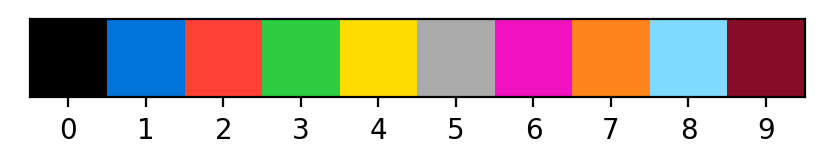

In [7]:
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

- Tasks have multiple `train` input-output pairs.
- Most tasks have a single `test` input-output pairs, although some have more than one.

## Show a task example

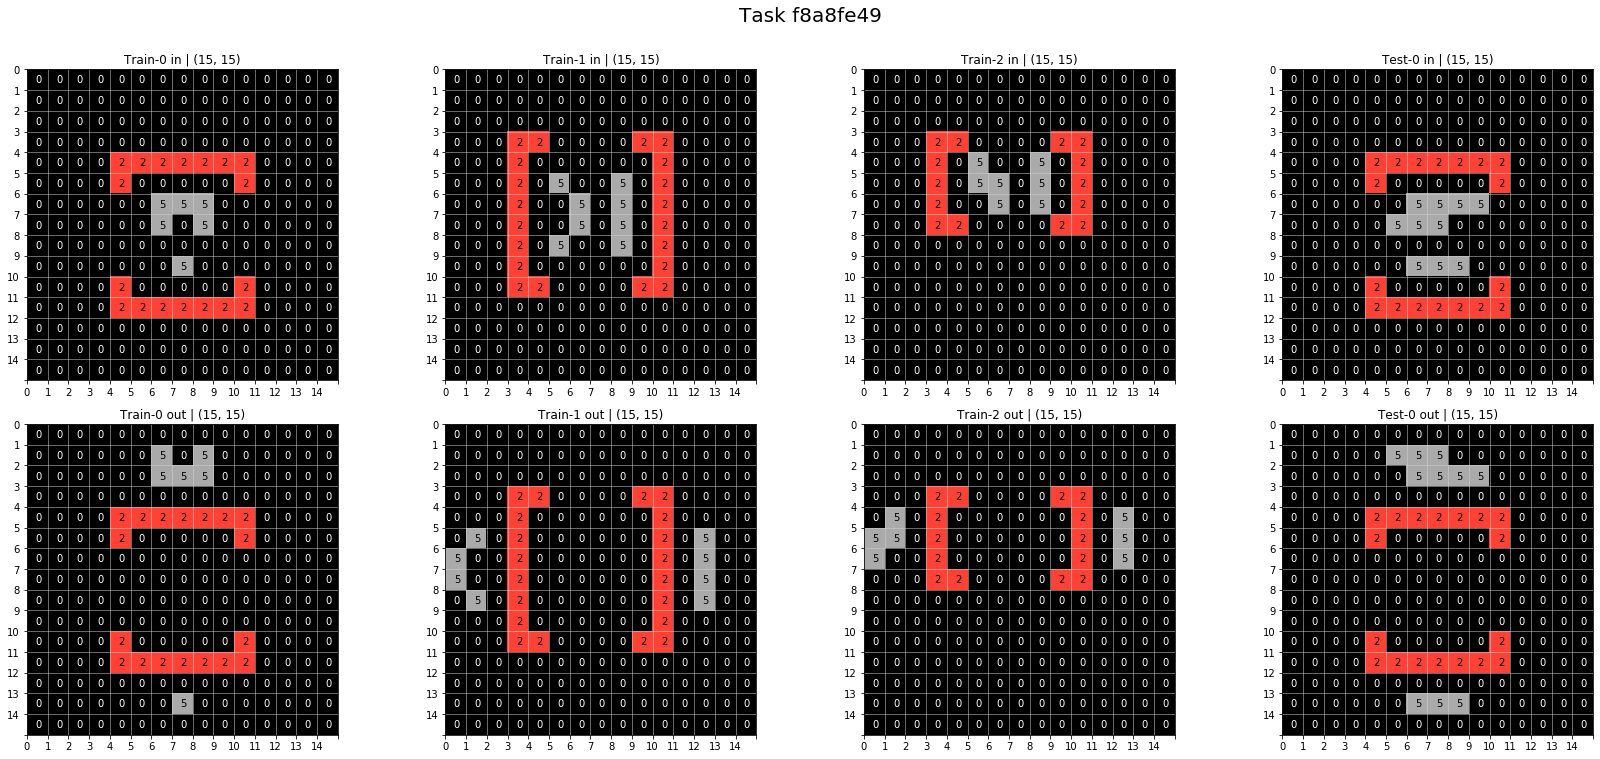

In [8]:
fname = 'f8be4b64.json'
tid = evaluation_tasks.index(fname)
# tid = 107
# tid = random.randint(0, 400)
load_and_plot(training_path, training_tasks[tid], annotate=True)

# DSL starter

- Inspired by [Jérémy Cochoy](https://www.kaggle.com/zenol42/dsl-and-genetic-algorithm-applied-to-arc)

In [496]:
def group_by_color_unlifted(pixmap):
    nb_colors = int(pixmap.max()) + 1
    splited = [(pixmap == i) * i for i in range(1, nb_colors)]
    return [x for x in splited if np.any(x)]


def crop_to_content_unlifted(pixmap):
    true_points = np.argwhere(pixmap)
    if len(true_points) == 0:
        return []
    top_left = true_points.min(axis=0)
    bottom_right = true_points.max(axis=0)
    pixmap = pixmap[top_left[0]:bottom_right[0] + 1,
                    top_left[1]:bottom_right[1] + 1]
    return pixmap


def negative_by_max_color_unlifted(pixmap):
    negative = np.logical_not(pixmap).astype(int)
    color = max(pixmap.max(), 1)
    return negative * color


def negative_by_most_frequent_color_unlifted(pixmap):
    negative = np.logical_not(pixmap).astype(int)
    # count color frequency, drop 0 count, argmax, then +1 to account 0
    color = np.argmax(np.bincount(pixmap.ravel())[1:]) + 1
    return negative * color

In [10]:
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [11]:
pixmap = np.array(task[0]['input'])

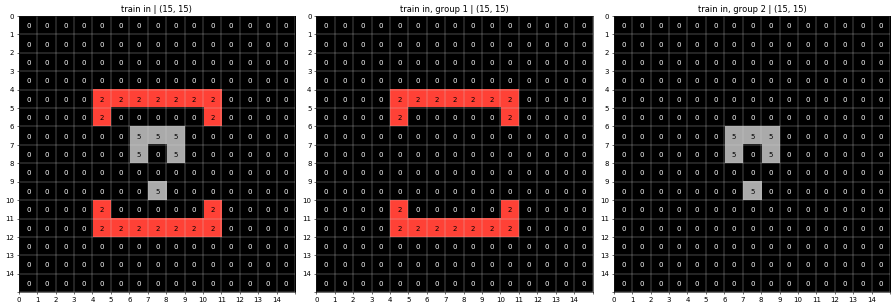

In [12]:
grouped = group_by_color_unlifted(pixmap)

n = len(grouped)

fig, axs = plt.subplots(1, n + 1, figsize=(6*(n+1), 8), dpi=50)
plt.subplots_adjust(wspace=0, hspace=0)
plot_one_ax(axs[0], pixmap, cmap=cmap, norm=norm, title='train in', annotate=True)
for i, group in enumerate(grouped):
    plot_one_ax(axs[i+1], group, cmap=cmap, norm=norm, title=f'train in, group {i + 1}', annotate=True)
plt.tight_layout()
plt.show()

# Solving manually all tasks with the 'crop' pattern (and some others)

### Insights

- Break solutions in composable functions. For example, the solution to Task 746b3537.
  - The idea is to select the row or the column based in the color homogeinity.
  - I solved directly, but the solution could be composed of functions or be constructed by trial and error. Look there for insightful comments.
  - See the new solution there.

## Task 1cf80156

- Patterns: crop *object*.

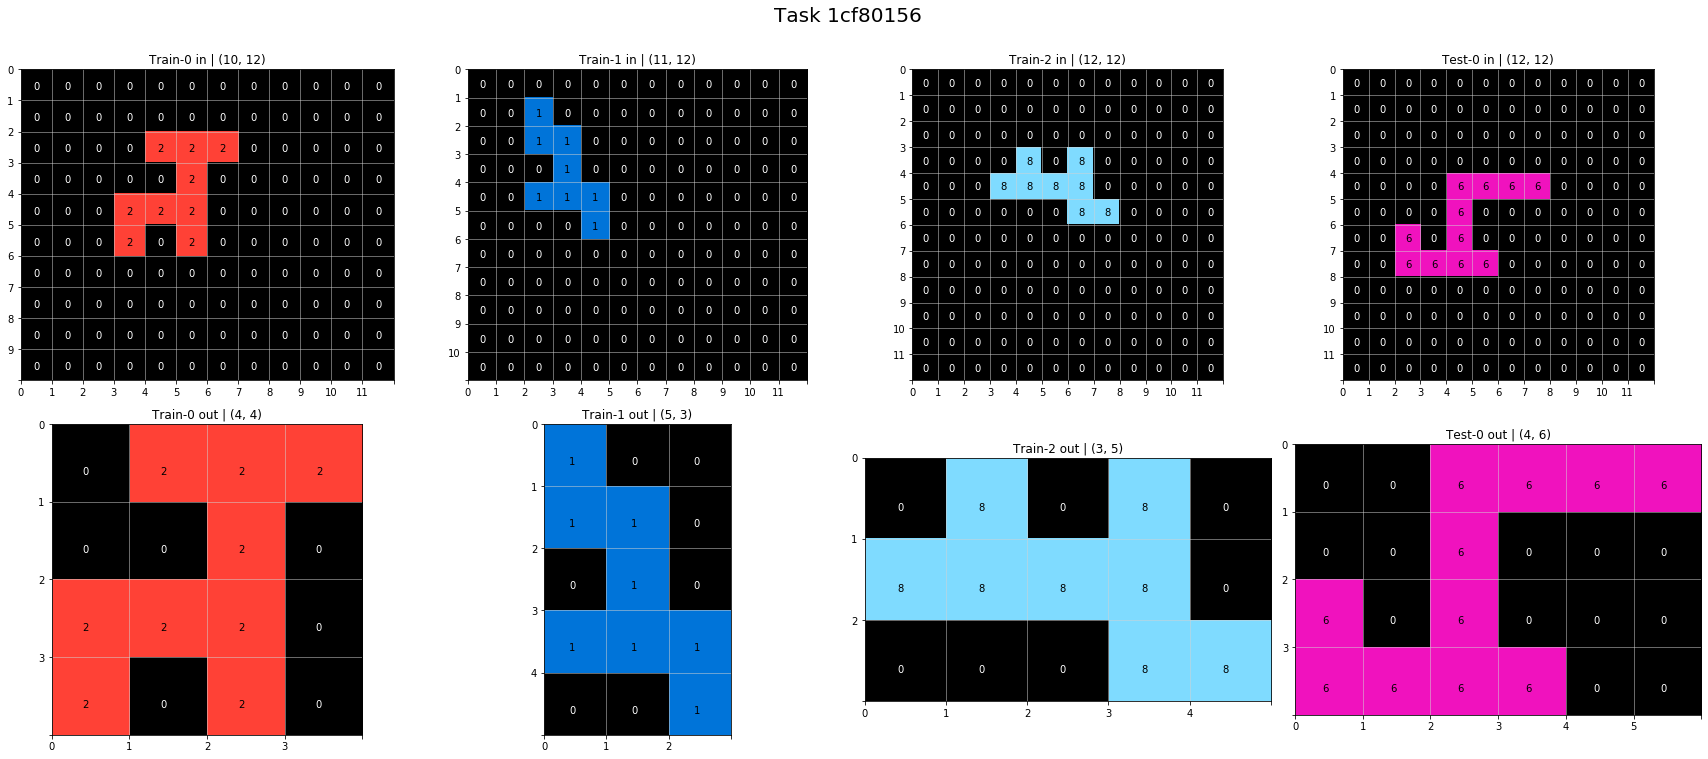

In [14]:
fname = '1cf80156.json'
tid = training_tasks.index(fname)
load_and_plot(training_path, training_tasks[tid], annotate=True)

In [17]:
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [226]:
def nth_sample(task, n):
    if n < 0 or n >= len(task):
        return None, None
    pixmap_in = np.array(task[n]['input'])
    pixmap_out = np.array(task[n]['output'])
    return pixmap_in, pixmap_out

In [36]:
pixmap_in, pixmap_out = nth_sample(task, 0)

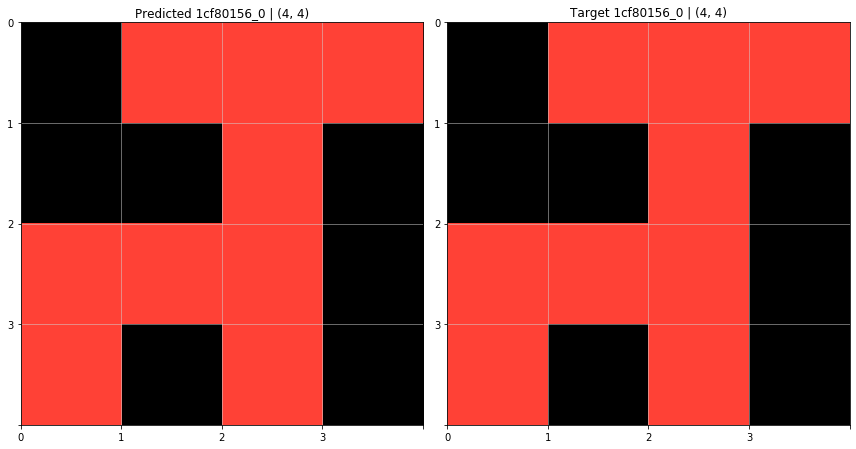

In [40]:
pred = crop_to_content_unlifted(pixmap_in)
plot_pred_and_target(pred, pixmap_out, fname[:-5] + '_0')

## Task 8f2ea7aa

- Patterns: crop, fractal_repetition.

In [42]:
fname = '8f2ea7aa.json'
tid = training_tasks.index(fname)
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [43]:
pixmap_in, pixmap_out = nth_sample(task, 0)

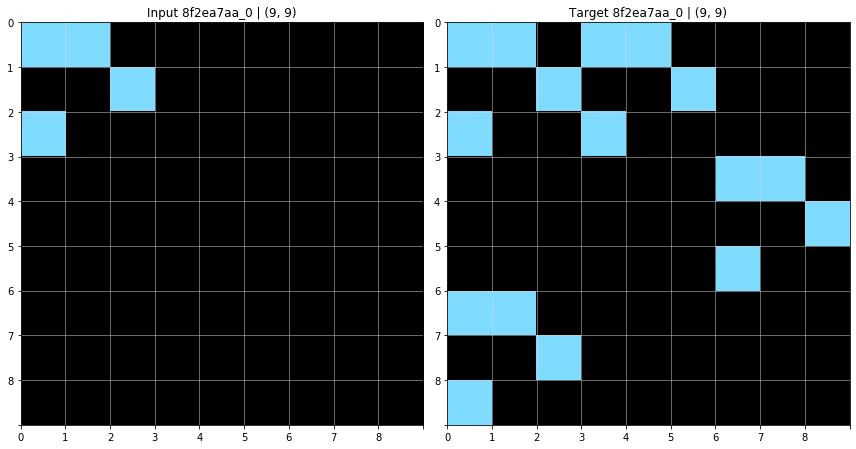

In [45]:
plot_pred_and_target(pixmap_in, pixmap_out, fname[:-5] + '_0', is_pred=False)

In [310]:
from numpy.lib.stride_tricks import as_strided


def fractal_repetition(pixmap):
    """
    Maps each pixel in the pattern to a
    window with pattern shape in the output pixmap.
    """

    # TODO: maybe won't work if pattern.shape ** 2 != pixmap.shape

    pixm_sh = pixmap.shape

    # Crop code (ideally, called before this method)
    pattern = crop_to_content_unlifted(pixmap)
    ptrn_sh = pattern.shape

    # Fractal repetition code
    out_sh = (pixm_sh[0] // ptrn_sh[0], pixm_sh[1] // ptrn_sh[1])
    output = np.tile(pattern, out_sh)
    xs, ys = np.indices(pixmap.shape, dtype=np.int8)
    # rationale: break pixmap in pattern shape, each block being pattern shape
    shape = out_sh + ptrn_sh
    strides = (pixm_sh[1] * ptrn_sh[0],  # bytes to next vertical block
               ptrn_sh[1],               # bytes to next horizontal block
               pixm_sh[1],               # bytes to next vertical element
               1)                        # bytes to next horizontal element
    # if pattern_shape is (3, 3),
    # then reshape gives n pattern blocks fitting pixmap
    reshape = (out_sh[0] * out_sh[1],) + ptrn_sh

    # block indices (this can be a util func?)
    xs_strided = as_strided(xs, shape=shape, strides=strides).reshape(*reshape)
    ys_strided = as_strided(ys, shape=shape, strides=strides).reshape(*reshape)

    # repeat pattern
    for i in range(reshape[0]):  # num of blocks in pixmap
        pixel = pattern[i // pattern.shape[0], i % pattern.shape[0]]
        output[xs_strided[i], ys_strided[i]] = pattern * (pixel != 0)

    return output

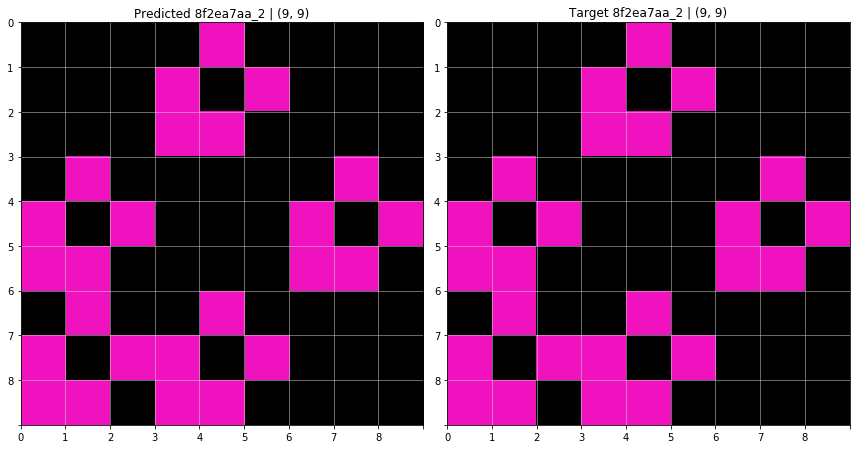

In [313]:
sample_id = 2
pixmap_in, pixmap_out = nth_sample(task, sample_id)
pred = fractal_repetition(pixmap_in)
plot_pred_and_target(pred, pixmap_out, fname[:-5] + f'_{sample_id}')

## Task 7468f01a

- Patterns: crop, image_reflection.

In [468]:
fname = '7468f01a.json'
tid = training_tasks.index(fname)
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [469]:
pixmap_in, pixmap_out = nth_sample(task, 0)

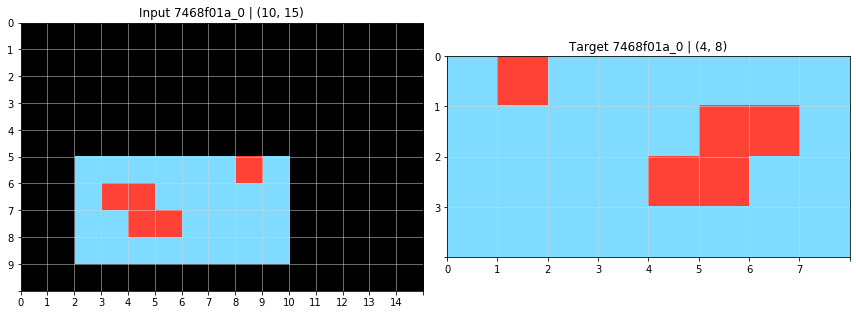

In [470]:
plot_pred_and_target(pixmap_in, pixmap_out, fname[:-5] + '_0', is_pred=False)

In [324]:
def reflect_image(pixmap):
    output = np.flip(pixmap, axis=1)
    return output

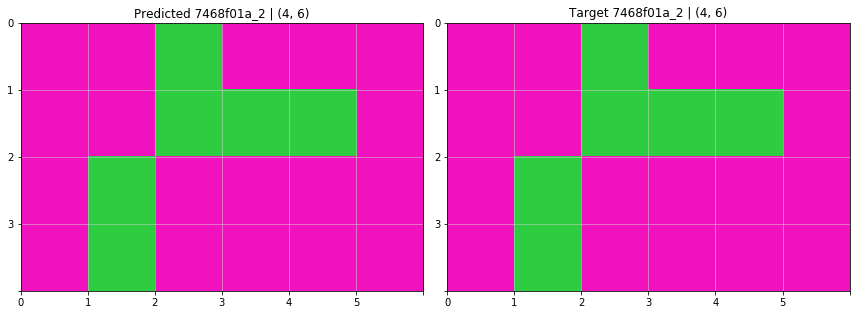

In [333]:
sample_id = 2
pixmap_in, pixmap_out = nth_sample(task, sample_id)
pred = reflect_image(crop_to_content_unlifted(pixmap_in))
plot_pred_and_target(pred, pixmap_out, fname[:-5] + f'_{sample_id}')

## Task 746b3537

- Patterns: crop, direction_guessing.

### Insights

- Crop line orthogonal to color direction. For example Train-0 out is a vertical crop, because color direction is horizontal.
- Drop repeated *continguous* colors. 
- This crop pattern is different from previous regarding what is being selected:
  - Previously it was objects surrounded by 0-pixels.
  - In this case, it isn't an object per si (what *is* a object, really?), but its properties.
  - This is easy: if first row has unique colors, color direction is column-wise.

### Solution

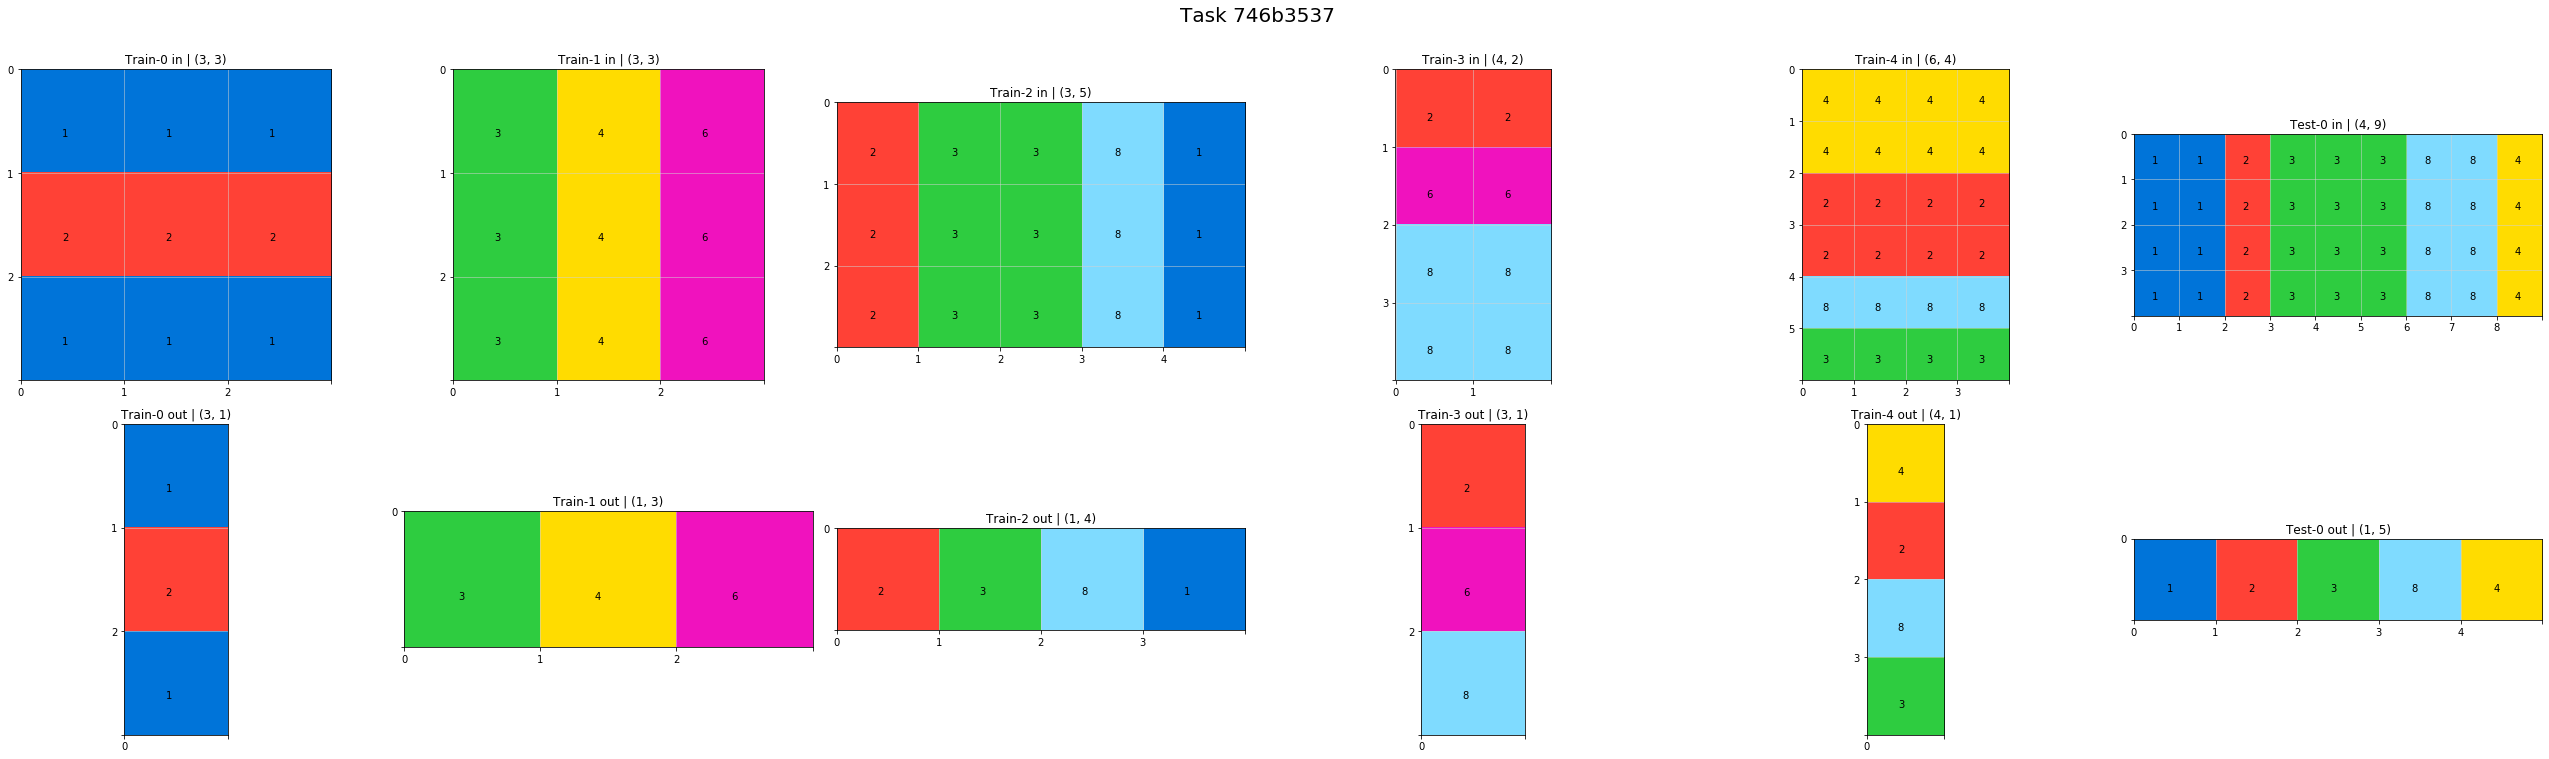

In [947]:
fname = '746b3537.json'
tid = training_tasks.index(fname)
task = load_and_plot(training_path, training_tasks[tid], return_what=2, annotate=True)

In [453]:
def crop_unique_colors_orthogonal_to_color_continuity(pixmap):
    # select
    row = pixmap[0]
    col = pixmap[:, 0]
    row_uniques = np.unique(row)
    col_uniques = np.unique(col)
    # define return
    return_row = row_uniques.shape[0] != 1
    output = row if return_row else col
    # delete repeated and contiguous elements
    del_idxs = np.nonzero(output[:-1] == output[1:])
    output = np.delete(output, del_idxs)
    # define return shape based on what it will return
    return_shape = (1, -1) if return_row else (-1, 1)
    return output.reshape(*return_shape)

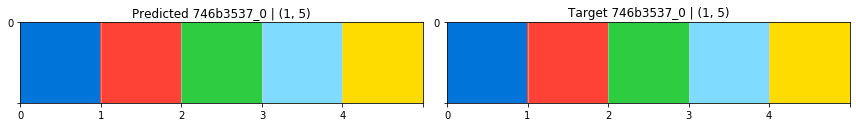

In [465]:
sample_id = 0
pixmap_in, pixmap_out = nth_sample(task['test'], sample_id)
pred = crop_unique_colors_orthogonal_to_color_continuity(pixmap_in)
plot_pred_and_target(pred, pixmap_out, 

### Solution with composable functions

- This is the idea. Learn how to compose solutions based on (input, output) pairs.

In [980]:
def unique_colors(pixmap):
    unique = np.unique(pixmap.ravel())
    return unique


def select_row(pixmap):
    i = 0  # can be learned
    row = pixmap[i]
    return row.copy()


def select_col(pixmap):
    i = 0
    col = pixmap[:, i]
    return col.copy()


def unique_rows(pixmap):
    del_rows = np.nonzero((pixmap_in[:-1, :] == pixmap_in[1:, :]).any(axis=1))
    output = np.delete(pixmap, del_rows, axis=0)
    return output


def unique_cols(pixmap):
    del_cols = np.nonzero((pixmap_in[:, :-1] == pixmap_in[:, 1:]).any(axis=0))
    output = np.delete(pixmap, del_cols, axis=0)
    return output


def reshape_to_row(pixmap):
    shape = (1, -1)  # can be learned
    return pixmap.reshape(*shape)


def reshape_to_col(pixmap):
    shape = (-1, 1)  # can be learned
    return pixmap.reshape(*shape)

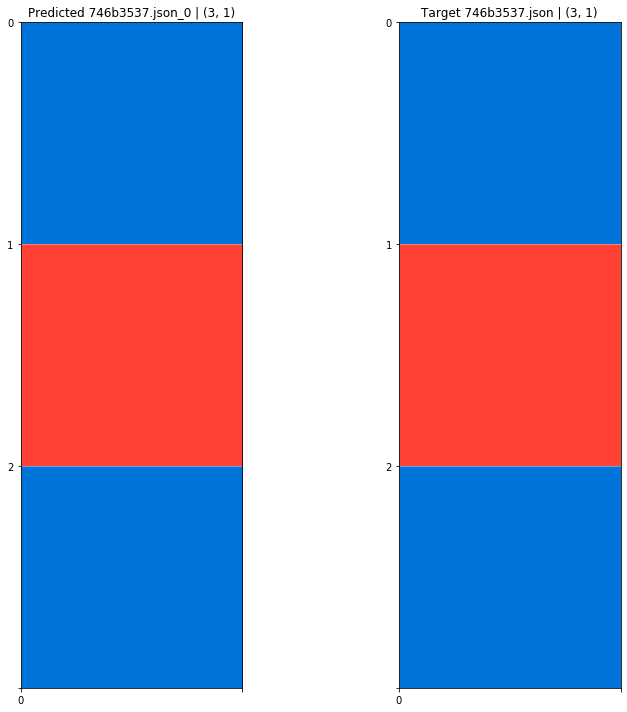

In [981]:
sample_id = 0
pixmap_in, pixmap_out = nth_sample(task['train'], sample_id)
pred = reshape_to_col(unique_rows(select_col(pixmap_in)))
plot_pred_and_target(pred, pixmap_out, fname, sample_id)

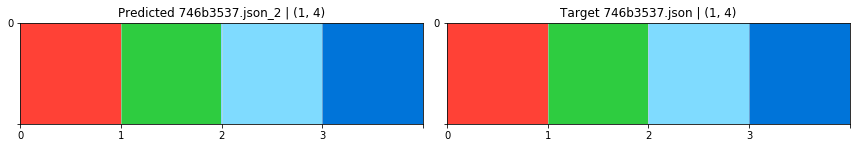

In [983]:
sample_id = 2
pixmap_in, pixmap_out = nth_sample(task['train'], sample_id)
pred = reshape_to_row(unique_cols(select_row(pixmap_in)))
plot_pred_and_target(pred, pixmap_out, fname, sample_id)

## Task 48d8fb45 [unsolved]

- Patterns: crop, find_the_intruder.
- Difficulty level: 5/10
- Need better solution.

### Insights

- Solution 1
    - Crop objects and select which has only two colors (foreground, background).
      - Crop by recursion:
        1. Select a random xy-position in the pixmap.
        2. Traces a vertical and a horizontal segments to split the pixmap in 4 subpixmaps, which including the segments.
           - Check if the segments intersect the objects. If there is at least...
    - Remove segment with intruder pixel.
- Solution 2
    - Infect and crop to content. But how dispose the intruder? Store its location.
    - Maybe cellular automata can be useful. In the kaggle there is a kernel trying to solve some problems with it.

### Solution

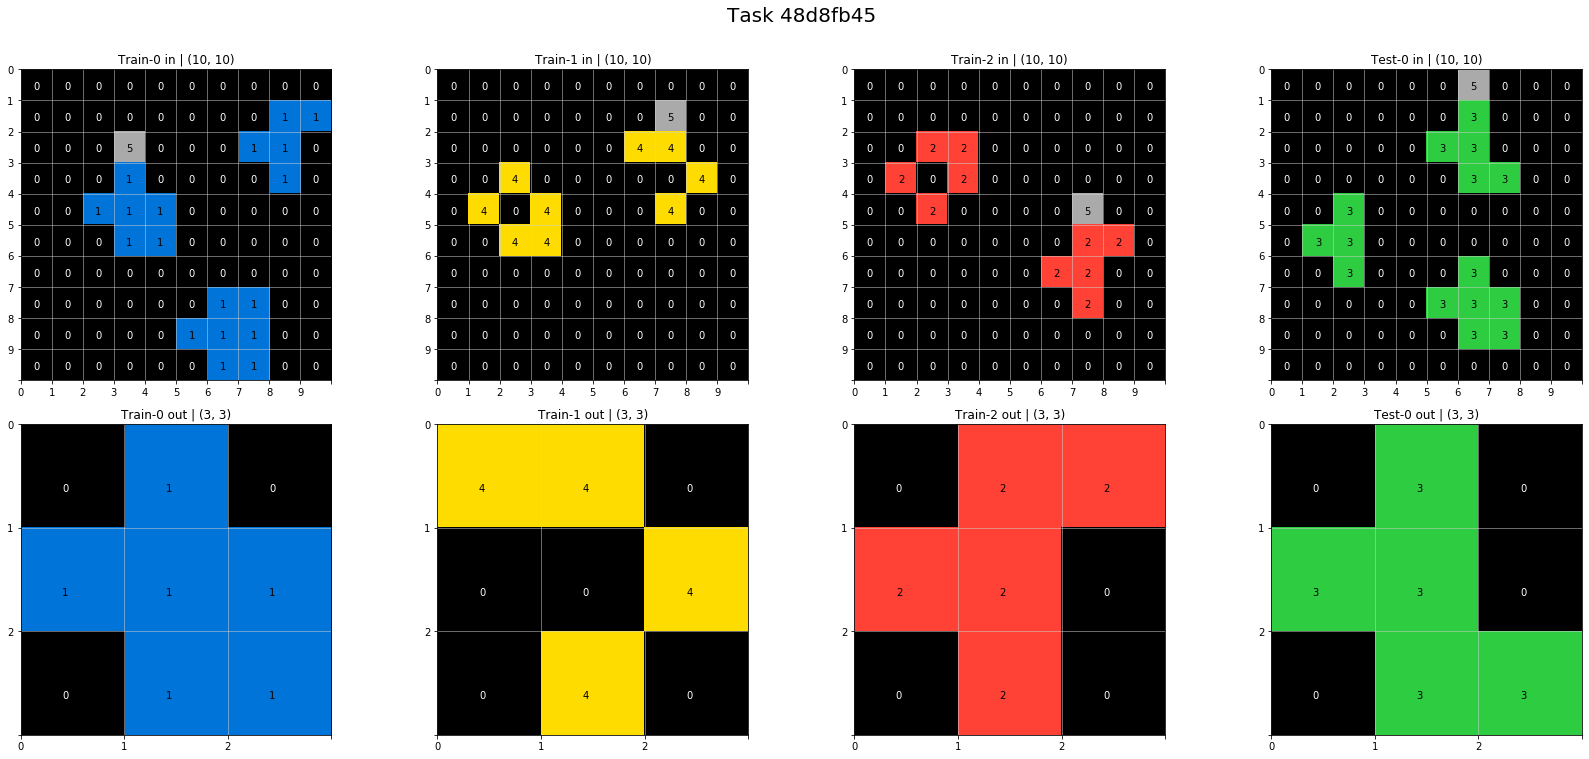

In [471]:
fname = '48d8fb45.json'
tid = training_tasks.index(fname)
task = load_and_plot(training_path, training_tasks[tid], return_what=2, annotate=True)

In [927]:
def infect(pixmap_in):
    pixmap = pixmap_in.copy()
    # count colors frequency
    count = np.bincount(pixmap.ravel())
    # find intruder location
    intruder = np.argmax(count == np.trim_zeros(np.sort(count))[0])
    intruder_coords = np.argwhere(pixmap == intruder)
    # find dominant color (ASSUMPTION: the intruder will be the least dominant, aside from the foreground)
    dominant = np.argmax(count == np.sort(count)[-2])
    # infect
    xs, ys = np.indices((3, 3))
    dx, dy = (intruder_coords - 1).reshape(-1,)
    while True:  # this may be not a good idea in the GP algorithm
        # center in a 3x3 block in intruder_location
        block = pixmap[xs + dx, ys + dy]
        # next one to infect
        coords = zip(*np.nonzero(block == dominant))
        try:
            next_x, next_y = next(coords)  # need only the first coord here (infect one per block, horizontally)
        except StopIteration:
            break  # this means that there is not more pixels to be infected
        # (dx, dy) is a vector from (0, 0) in pixmap to block (0, 0)
        # (next_x, next_y) is a vector from (0, 0) in block to where next_to_infect is
        coords = (next_x + dx, next_y + dy)
        pixmap[coords] = intruder
        # next block will center in this infected pixel
        dx, dy = coords  # coords in the block center
        dx, dy = dx - 1, dy - 1  # displacement to origin (0, 0)

    # rationale? just to solve; need to eval in other similar cases.
    x, y = intruder_coords[0]
    pixmap[x, y] = 0  # FIXME?: this maybe won't generalize to other similar cases

    return pixmap


In [928]:
def normalize_color_by_dominant(pixmap_in):
    pixmap = pixmap_in.copy()
    count = np.bincount(pixmap.ravel())
    dominant = np.argmax(count == np.sort(count)[-2])
    weak = np.argmax(count == np.trim_zeros(np.sort(count))[0])
    weak_idxs = np.nonzero(np.logical_and(pixmap == weak, pixmap != 0))
    pixmap[weak_idxs] = dominant
    return pixmap

In [934]:
sample_id = 2
pixmap_in, pixmap_out = nth_sample(task['train'], sample_id)

## Task 28bf18c6 (similar to 8f2ea7aa)

- Patterns: crop, pattern repetition.
- Solved with `fractal_repetition` from task 56 (8ef2ea7aa).
  - Mostly because `pixmap.shape` restricts output shape.

In [937]:
fname = '28bf18c6.json'
tid = training_tasks.index(fname)
task = just_load_task(training_tasks[tid], training_path)
task = task['train']

In [938]:
pixmap_in, pixmap_out = nth_sample(task, 0)

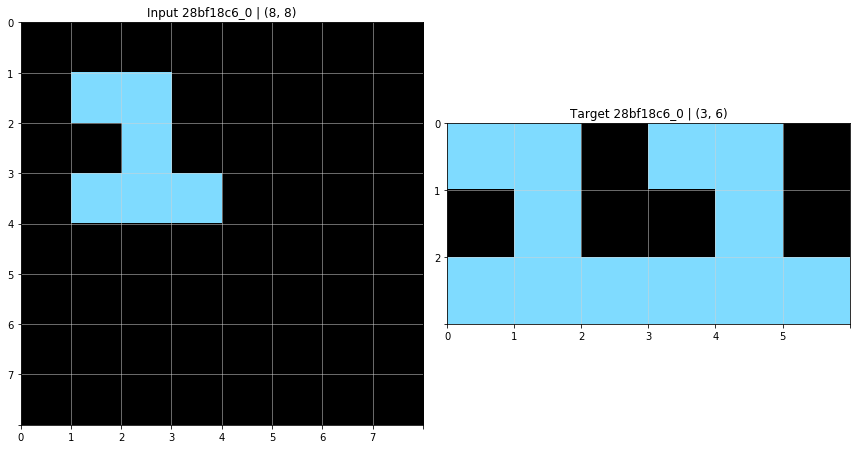

In [939]:
plot_pred_and_target(pixmap_in, pixmap_out, fname[:-5] + '_0', is_pred=False)

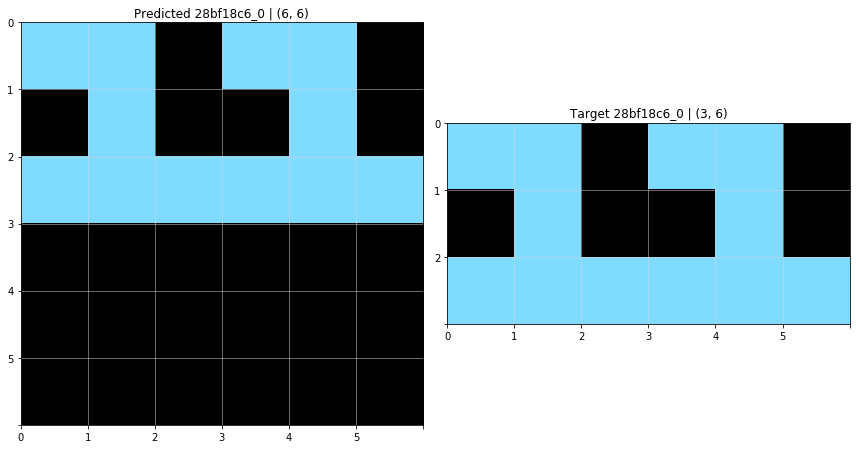

In [942]:
sample_id = 0
pixmap_in, pixmap_out = nth_sample(task, sample_id)
pred = fractal_repetition(pixmap_in)
plot_pred_and_target(pred, pixmap_out, fname[:-5] + f'_{sample_id}')

## Task 134 [partially solved; need learning]

- Patterns: crop, rectangle_guessing.
- Is it okay to use the input and output in the method?
  - For the traininig samples, sure. For evaluation and test? Nope. You need to learn the way, padawan.

### Solution

- Aim to solve way similar to 3.4.3 (746b3537).

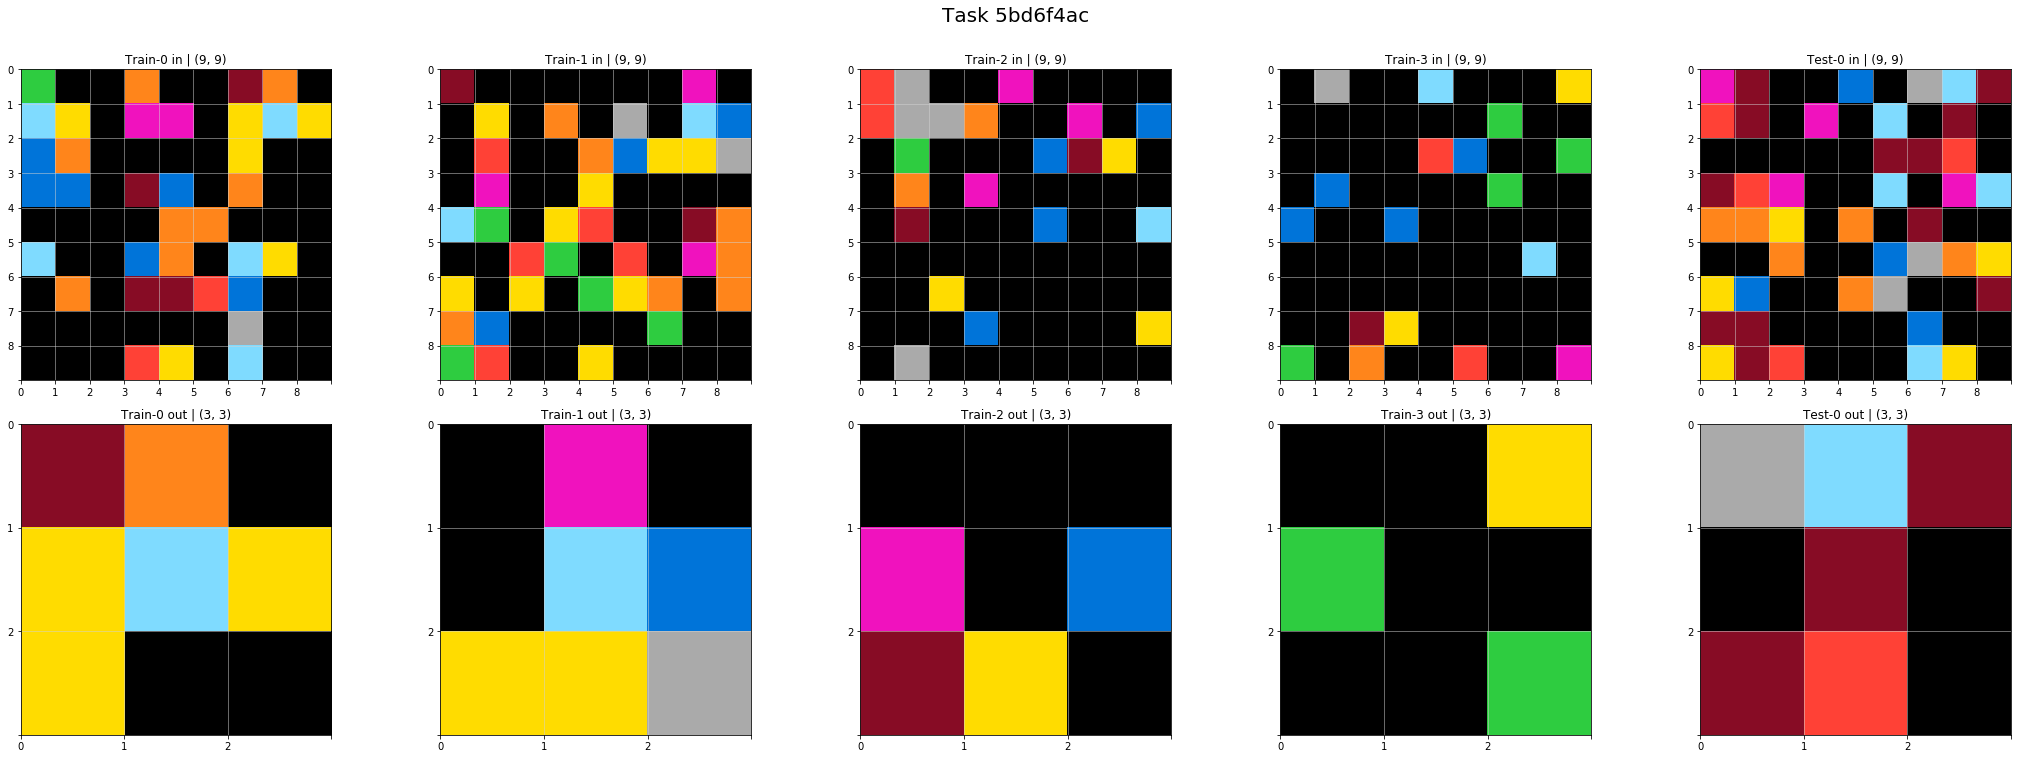

In [996]:
fname = '5bd6f4ac.json'
tid = training_tasks.index(fname)
task = load_and_plot(training_path, training_tasks[tid], return_what=2)

In [997]:
task = task['train']
pixmap_in, pixmap_out = nth_sample(task, 0)

In [1062]:
def find_rectangle(pixmap):
    """This function is similar to `fractal_repetition`."""
    pixm_sh = pixmap_in.shape
    xs, ys = np.indices(pixm_sh, dtype=np.int8)

    # must be learned
    rect_sh = (3, 3)

    # generalization of previous definition
    stride = 1  # can be learned
    out_sh = ((pixm_sh[0] - rect_sh[0]) // stride + 1,
              (pixm_sh[1] - rect_sh[1]) // stride + 1)

    shape = out_sh + rect_sh
    strides = (pixm_sh[1],               # bytes to next vertical block
               1,                        # bytes to next horizontal block
               pixm_sh[1],               # bytes to next vertical element
               1)                        # bytes to next horizontal element
    reshape = (out_sh[0] * out_sh[1],) + rect_sh
    xs_strided = as_strided(xs, shape=shape, strides=strides).reshape(*reshape)
    ys_strided = as_strided(ys, shape=shape, strides=strides).reshape(*reshape)
    i = np.random.randint(0, reshape[0])  # must be learned
    return pixmap_in[xs_strided[i], ys_strided[i]].copy()

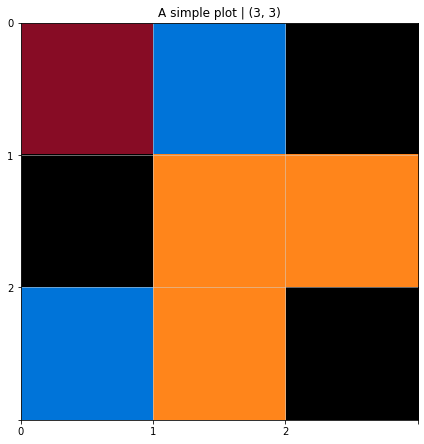

In [1063]:
just_plot(find_rectangle(pixmap_in))

### Task 38 [partialy solved; need learning]

- Patterns: crop, pattern_deconstruction.

### Solution

- Solution 1
    - Crop to content, then guess rectangle.
- Solution 2
    - Crop to content, then break in four parts. The solution must be learned.

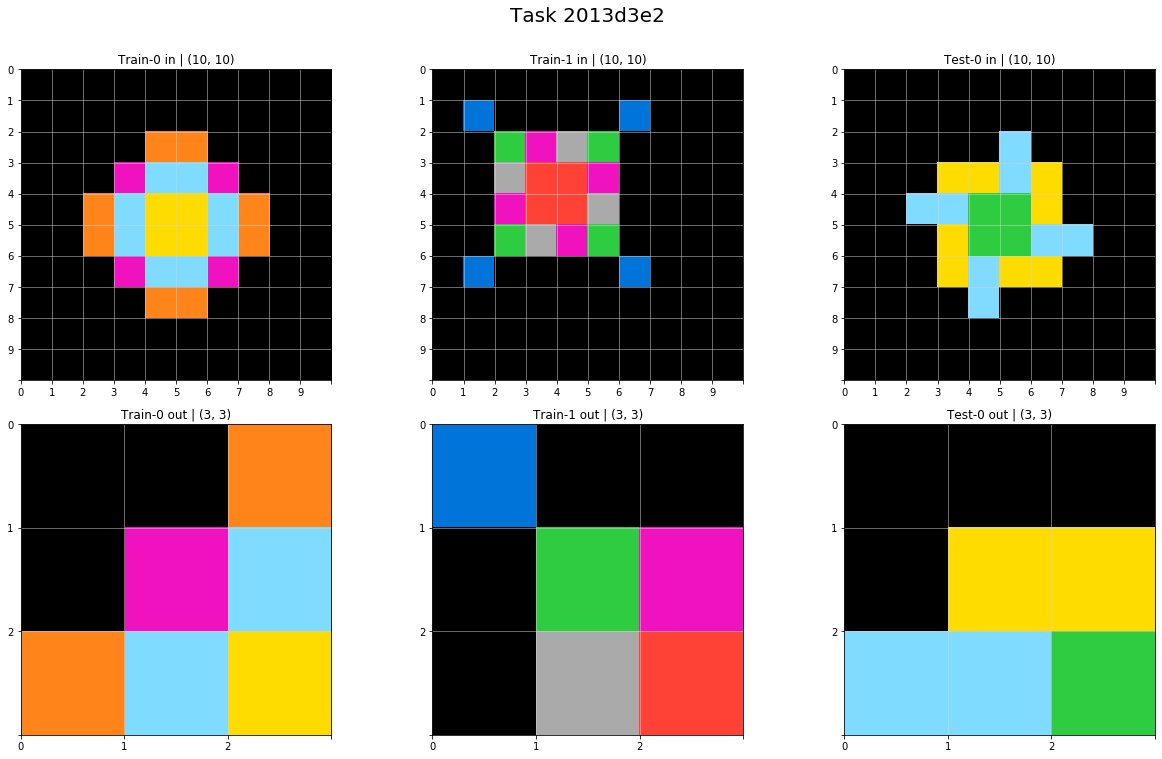

In [1108]:
fname = '2013d3e2.json'
tid = training_tasks.index(fname)
task = load_and_plot(training_path, training_tasks[tid], return_what=2)

In [1109]:
task = task['train']

In [1110]:
pixmap_in, pixmap_out = nth_sample(task, 0)

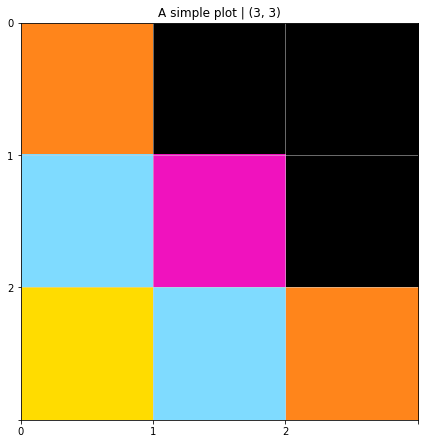

In [1111]:
just_plot(find_rectangle(crop_to_content_unlifted(pixmap_in)))

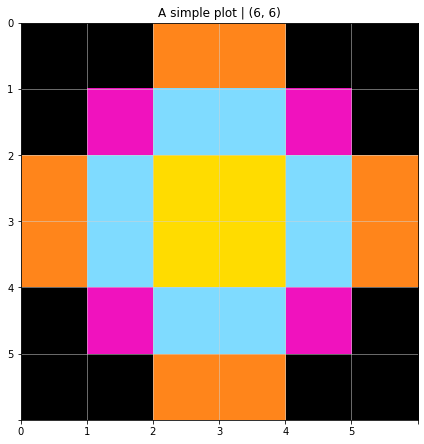

In [1129]:
pred = crop_to_content_unlifted(pixmap_in)
just_plot(pred)

In [1130]:
def retrieve_quadrants(pixmap):
    """
    This function is similar to `fractal_repetition`.
    NOTE: reusing the function AGAIN.

    I just modified the `stride`, the `out_sh` name,
    and the second component of `strides.
    """
    pixm_sh = pixmap.shape
    xs, ys = np.indices(pixm_sh, dtype=np.int8)

    # must be learned
    rect_sh = (3, 3)

    # generalization of previous definition
    stride = 3  # can be learned
    blks_sh = ((pixm_sh[0] - rect_sh[0]) // stride + 1,
              (pixm_sh[1] - rect_sh[1]) // stride + 1)

    shape = blks_sh + rect_sh
    strides = (pixm_sh[1] * stride,               # bytes to next vertical block
               stride,                   # bytes to next horizontal block
               pixm_sh[1],               # bytes to next vertical element
               1)                        # bytes to next horizontal element
    reshape = (blks_sh[0] * blks_sh[1],) + rect_sh
    xs_strided = as_strided(xs, shape=shape, strides=strides).reshape(*reshape)
    ys_strided = as_strided(ys, shape=shape, strides=strides).reshape(*reshape)
    i = np.random.randint(0, reshape[0])  # must be learned
    return pixmap[xs_strided[i], ys_strided[i]].copy()

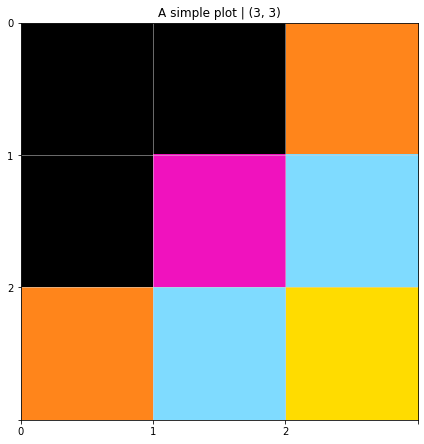

In [1138]:
just_plot(retrieve_quadrants(pred))